In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd


In [2]:
train_df = pd.read_csv('Google_Stock_Price_Train.csv')
test_df = pd.read_csv('Google_Stock_Price_Test.csv')

In [5]:
train_df.head(2)

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"


In [18]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1258 non-null   object 
 1   Open    1258 non-null   float64
 2   High    1258 non-null   float64
 3   Low     1258 non-null   float64
 4   Close   1258 non-null   object 
 5   Volume  1258 non-null   object 
dtypes: float64(3), object(3)
memory usage: 59.1+ KB


In [19]:
train= train_df.iloc[:,1:2].values

In [29]:
from sklearn.preprocessing import MinMaxScaler
sc= MinMaxScaler()
train_sc= sc.fit_transform(train)

In [33]:
x= []
y= []
for i in range(60,1258):
    x.append(train_sc[i-60:i,0])
    y.append(train_sc[i,0])
    
x= np.array(x)
y= np.array(y)


In [34]:
x.shape

(1198, 60)

In [36]:
x= x.reshape(x.shape[0],x.shape[1],1)

In [44]:
y.reshape(1198,1)

array([[0.08627874],
       [0.08471612],
       [0.07454052],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

In [40]:
from keras import models
from keras import layers

In [41]:
rnn= models.Sequential([
    layers.LSTM(units= 60, return_sequences= True, input_shape= (x.shape[1],x.shape[2])),
    layers.Dropout(0.2),
    layers.LSTM(units= 60, return_sequences= True),
    layers.Dropout(0.2),
    layers.LSTM(units= 60, return_sequences= True),
    layers.Dropout(0.2),
    layers.LSTM(units= 60),
    layers.Dropout(0.2),
    layers.Dense(1)
])

In [42]:
rnn.compile(optimizer='adam',loss='mean_squared_error',metrics=['accuracy'])

In [45]:
rnn.fit(x, y, validation_split= 0.2, batch_size= 32, epochs= 100)

Epoch 1/100
30/30 [==============================] - 35s 364ms/step - loss: 0.0299 - accuracy: 0.0010 - val_loss: 0.0044 - val_accuracy: 0.0042
Epoch 2/100
30/30 [==============================] - 8s 271ms/step - loss: 0.0056 - accuracy: 0.0010 - val_loss: 0.0084 - val_accuracy: 0.0042
Epoch 3/100
30/30 [==============================] - 6s 214ms/step - loss: 0.0042 - accuracy: 0.0010 - val_loss: 0.0050 - val_accuracy: 0.0042
Epoch 4/100
30/30 [==============================] - 7s 222ms/step - loss: 0.0040 - accuracy: 0.0010 - val_loss: 0.0022 - val_accuracy: 0.0042
Epoch 5/100
30/30 [==============================] - 7s 229ms/step - loss: 0.0037 - accuracy: 0.0010 - val_loss: 0.0028 - val_accuracy: 0.0042
Epoch 6/100
30/30 [==============================] - 7s 229ms/step - loss: 0.0034 - accuracy: 0.0010 - val_loss: 0.0066 - val_accuracy: 0.0042
Epoch 7/100
30/30 [==============================] - 7s 231ms/step - loss: 0.0033 - accuracy: 0.0010 - val_loss: 0.0054 - val_accuracy: 0.004

Epoch 58/100
30/30 [==============================] - 6s 213ms/step - loss: 0.0015 - accuracy: 0.0010 - val_loss: 9.6316e-04 - val_accuracy: 0.0042
Epoch 59/100
30/30 [==============================] - 6s 214ms/step - loss: 0.0015 - accuracy: 0.0010 - val_loss: 0.0032 - val_accuracy: 0.0042
Epoch 60/100
30/30 [==============================] - 7s 219ms/step - loss: 0.0016 - accuracy: 0.0010 - val_loss: 0.0011 - val_accuracy: 0.0042
Epoch 61/100
30/30 [==============================] - 7s 221ms/step - loss: 0.0014 - accuracy: 0.0010 - val_loss: 9.4950e-04 - val_accuracy: 0.0042
Epoch 62/100
30/30 [==============================] - 6s 216ms/step - loss: 0.0015 - accuracy: 0.0010 - val_loss: 9.2130e-04 - val_accuracy: 0.0042
Epoch 63/100
30/30 [==============================] - 7s 220ms/step - loss: 0.0017 - accuracy: 0.0010 - val_loss: 0.0038 - val_accuracy: 0.0042
Epoch 64/100
30/30 [==============================] - 7s 220ms/step - loss: 0.0014 - accuracy: 0.0010 - val_loss: 8.7103e-04

In [92]:
real_price= test_df['Open'].values

In [93]:
total_df = pd.concat((test_df['Open'], train_df['Open']), axis= 0)
inputs= total_df[len(total_df) - len(test_df) - 60 :].values

In [94]:
inputs.shape

(80,)

In [95]:
inputs= inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_price = rnn.predict(X_test)
predicted_price = sc.inverse_transform(predicted_price)

1/1 [==============================] - 0s 95ms/step


In [96]:
import matplotlib.pyplot as plt

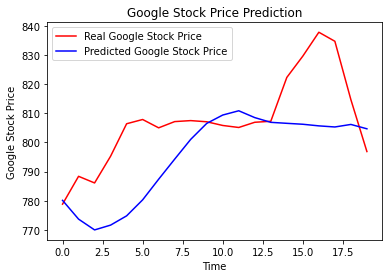

In [97]:
plt.plot(real_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()